# Pymaceuticals Inc.
---
Context: This Pymaceuticals dataset consists of two separate data sources: First dataset contains the mouse metrics such as the unique mouse ID, their gender, age, weight and drug regimen; Second dataset contains the unique mouse ID, timepoint, tumor volume. 
Objective: This analysis was designed to evaluate the impact of different drug regimens and how the mouse tumors evolved over time. The mouse gender, and timepoint are some of the factors taken into consideration for the overall performance of the various treatements.

Solution: I used the Python scripting to analyze the passing rate of reading and math for each school, and calculated the per capita budget for individual schools.

Findings: Based on the school level summary, Bailey High School had the highest total budget and Holden High School had the lowest total budget. Based on the calculated per student budget, Bailey has 581 allocated for each Holden student. Interestingly, the overall passing rate for Bailey is 54.64% and Holden is a high of 89.23%.

Finding Explanation:Across the board, most schools have a higher reading passing rate than Math passing rate. But most importantly, schools with lower head counts seem to drastically outperform schools with three to four thousand students. Additionally,there's a noticeable difference between student head counts of passing math and reading. It is reasonable to argue that the larger the school size, the more obvious there's a shortage of students passing math. A variety of factors may be contributing to this outcome, including limited support on math tutoring and lowered faculty to student ratio,etc.

Citation:

When troubleshooting my code, our instructor Hunter and TA Sam helped me correct a couple dataframe type errors to ensure syntax operated correctly.

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results,how="left", on=["Mouse ID"])

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_count = combined_data["Mouse ID"].count()
# If unique counts: combined_data.nuniquie()
mouse_count

# Testing: if 860,869 has dup Mouse ID & Timepoint 
combined_data.iloc[859:870]



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
859,g107,Ketapril,Female,2,29,10,53.435987,0
860,g107,Ketapril,Female,2,29,15,58.135545,0
861,g107,Ketapril,Female,2,29,20,62.706031,0
862,g107,Ketapril,Female,2,29,25,64.663626,0
863,g107,Ketapril,Female,2,29,30,69.160520,0
864,g107,Ketapril,Female,2,29,35,71.905117,0
865,g296,Zoniferol,Female,14,29,0,45.000000,0
866,g296,Zoniferol,Female,14,29,5,46.593233,0
867,g296,Zoniferol,Female,14,29,10,48.269509,0
868,g296,Zoniferol,Female,14,29,15,49.653244,1


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicate_mouse

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_rows = combined_data[duplicate_mouse]
duplicate_mouse_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# duplicate_mouse_id = duplicate_mouse_rows{"Mouse ID"}
# drop_duplicates_df = combined_data.drop_duplicates(inplace=True)
clean_df = combined_data.loc[combined_data['Mouse ID'] != 'g989']
clean_df
# How to tell dup rows dropped?

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_data = clean_df.groupby('Drug Regimen')
grouped_data.head()

tumor_volume_mean = clean_df["Tumor Volume (mm3)"].mean()
tumor_volume_median = clean_df["Tumor Volume (mm3)"].median()
tumor_volume_var = clean_df["Tumor Volume (mm3)"].var()
tumor_volume_std = clean_df["Tumor Volume (mm3)"].std()
tumor_volume_sem = clean_df["Tumor Volume (mm3)"].sem()
     # The sem() method calculates the standard error of the mean for each column.

In [8]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_statistics = pd.DataFrame({"mean":tumor_volume_mean,"median":tumor_volume_median,"var":tumor_volume_var,"std":tumor_volume_std, "sem":tumor_volume_sem}, index = [0])
summary_statistics
summary_statistics.style.set_caption("Tumor Volume(mm3)")

summary_statistics

,mean,median,var,std,sem
0,50.435293,48.933454,79.462907,8.914197,0.205591


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

simple_summary_df = pd.DataFrame({"mean":(combined_data.groupby('Drug Regimen'))["Tumor Volume (mm3)"].mean(), "median":(combined_data.groupby('Drug Regimen'))["Tumor Volume (mm3)"].median(), "var":(combined_data.groupby('Drug Regimen'))["Tumor Volume (mm3)"].var(),"std":(combined_data.groupby('Drug Regimen'))["Tumor Volume (mm3)"].std(), "sem":(combined_data.groupby('Drug Regimen'))["Tumor Volume (mm3)"].sem()})
simple_summary_df.style.set_caption("Tumor Volume(mm3)")
simple_summary_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

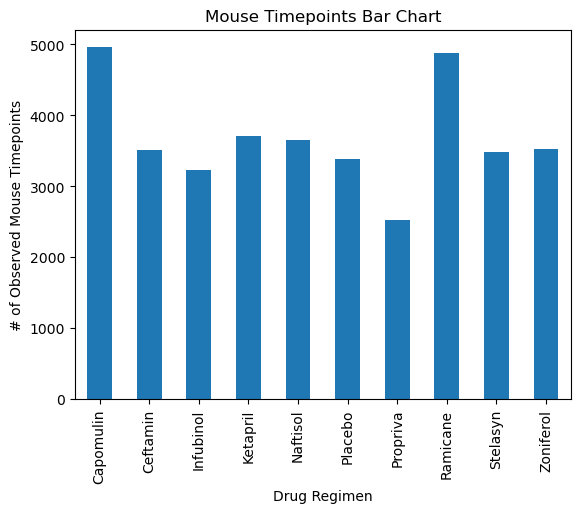

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_chart_df = clean_df.groupby('Drug Regimen')['Timepoint'].sum()
bar_chart_df.plot(kind='bar')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Mouse Timepoints Bar Chart')
plt.show()



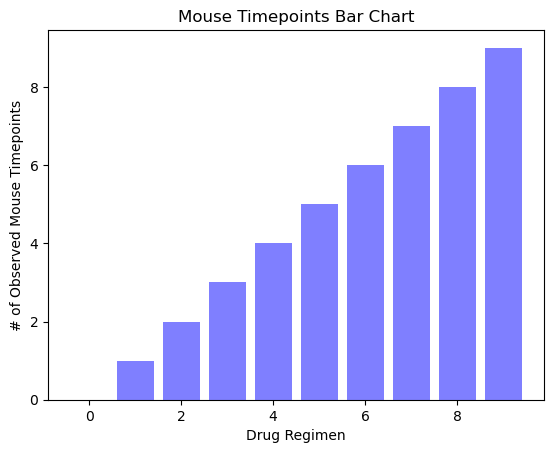

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import numpy as np
x_axis = np.arange(len(clean_df.groupby('Drug Regimen')))
x_axis
y_axis = clean_df.groupby('Drug Regimen')["Timepoint"]
y_axis = np.arange(len(clean_df.groupby('Drug Regimen')["Timepoint"]))
y_axis
tick_locations = [value for value in x_axis]
plt.bar(x_axis, y_axis, color = "b", alpha = 0.5, align = "center")

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Mouse Timepoints Bar Chart')


plt.show()

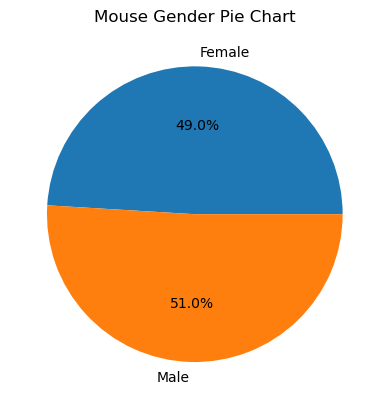

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_grouped_data = clean_df.groupby(['Sex']).size()
sex_grouped_data
# pie_chart_data = sex_grouped_data
# pie_chart_data

labels = sex_grouped_data.index
sex_grouped_data.plot.pie(y='Mouse ID', autopct='%1.1f%%')

plt.title('Mouse Gender Pie Chart')
# plt.axis('equal')
plt.show()

In [13]:
# Answer for above q

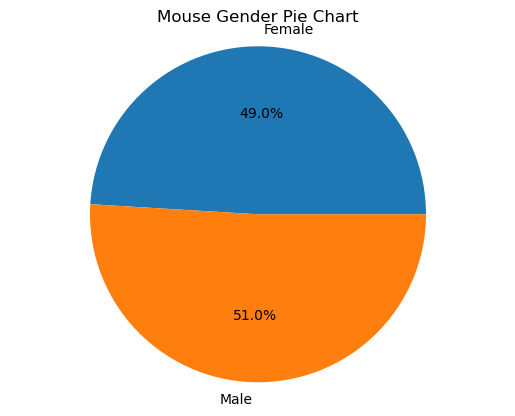

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


sex_grouped_data = clean_df.groupby(["Sex"]).count()
pie_chart_data = sex_grouped_data['Mouse ID']
pie_chart_data

labels = sex_grouped_data.index


pie_chart = plt.pie(pie_chart_data, labels = labels,autopct='%1.1f%%')

plt.title('Mouse Gender Pie Chart')
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
Last_timepoint = clean_df.groupby(['Mouse ID'])['Timepoint'].max().reset_index()
Last_timepoint

# # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Tumor_last_timepoint = pd.merge(Last_timepoint, clean_df, on=['Timepoint', 'Mouse ID'], how='inner')
Tumor_last_timepoint.head(20)
#     # Tumor_clean_merge = pd.merge(Tumor_last_timepoint, Final_tumor_volume, on='Drug Regimen', how='left')
#     # Tumor_clean_merge
# Tumor_last_timepoint
# Tumor_last_timepoint_df = Tumor_last_timepoint.groupby('Drug Regimen')
# Tumor_last_timepoint_df.head()



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumors = Tumor_last_timepoint.loc[Tumor_last_timepoint["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume.append(tumors)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumors.quantile([.25, .5, .75])

    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = tumors.loc[(tumors<lower_bound) | (tumors>upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")

# # Tumor_last_timepoint = Tumor_last_timepoint.astype(float)
# Tumor_last_timepoint['Timepoint'] = Tumor_last_timepoint['Timepoint'].astype(float)
# Tumor_last_timepoint_column = Tumor_last_timepoint['Timepoint']
# quartiles = Tumor_last_timepoint_column.quantile([.25, .5, .75])


# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq - lowerq

#     # Locate the rows which contain mice on each drug and get the tumor volumes
# Capomulin_tumor_volume = clean_df.loc[clean_df["Drug Regimen"]  == "Capomulin"]
# Capomulin_tumor_volume.head()
# Ramicane_tumor_volume = clean_df.loc[clean_df["Drug Regimen"]  == "Ramicane"]
# Ramicane_tumor_volume.head()
# Infubinol_tumor_volume = clean_df.loc[clean_df["Drug Regimen"]  == "Infubinol"]
# Infubinol_tumor_volume.head()
# Ceftamin_tumor_volume = clean_df.loc[clean_df["Drug Regimen"]  == "Ceftamin"]
# Ceftamin_tumor_volume.head()
    
# # add subset 
# # sub_set_df = pd.merge(Capomulin_tumor_volume, Ramicane_tumor_volume, Infubinol_tumor_volume, Ceftamin_tumor_volume, on=['Mouse ID'], how='inner')
    
# # Determine outliers using upper and lower bounds
# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq - (1.5*iqr)
# lower_bound
# upper_bound

# # for x in Tumor_last_timepoint:
# #     if x > upper_bound:
# #         outliers.append()
# #     if x < lower_bound:
#         outliers.append()

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [17]:
tumor_volume

[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 76     33.562402
 77     36.374510
 91     31.560470
 93     36.134852
 96     22.050126
 119    30.564625
 126    31.095335
 157    45.220869
 158    36.561652
 166    37.225650
 168    43.419381
 177    30.276232
 190    40.667713
 217    43.166373
 235    44.183451
 244    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

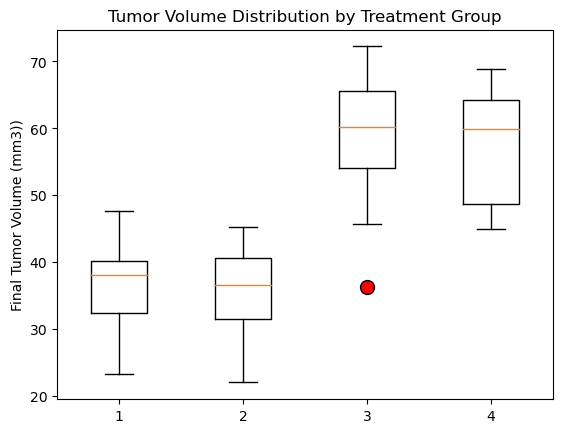

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Distribution by Treatment Group')
ax1.set_ylabel('Final Tumor Volume (mm3))')
# x_axis = np.arange(0,treatments)
outlier_marker = dict(marker='o', markerfacecolor='red', markersize=10)
ax1.boxplot(tumor_volume, flierprops=outlier_marker)
plt.show()

## Line and Scatter Plots

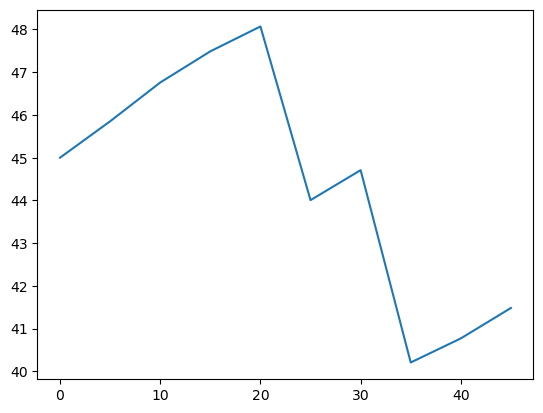

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_data_df = clean_df.loc[clean_df["Mouse ID"] == "l509"]
mouse_data_df

# Create a legend for our chart
y=mouse_data_df["Tumor Volume (mm3)"]
x=mouse_data_df["Timepoint"]
capomulin = plt.plot(x, y)

plt.show()


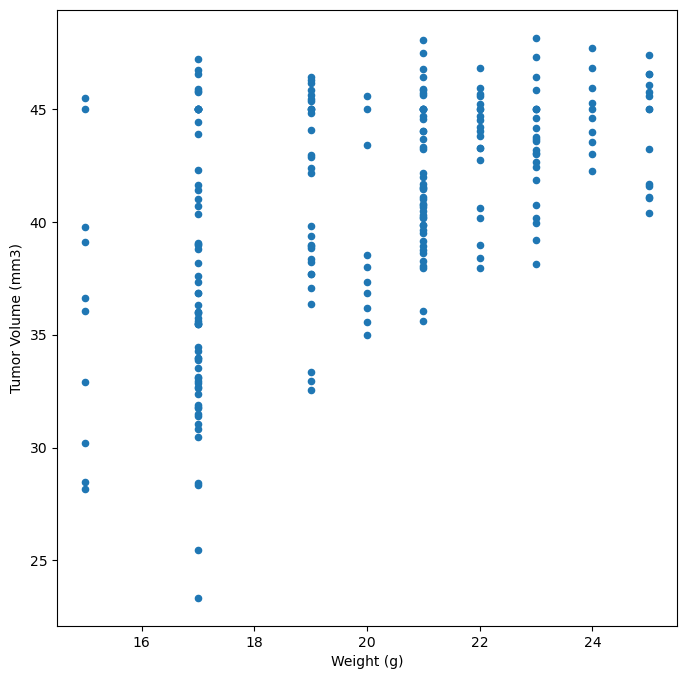

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_data_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
x_axis = Capomulin_data_df["Weight (g)"]
y_axis = Capomulin_data_df["Tumor Volume (mm3)"]
# plt.scatter(x_axis, y_axis, facecolors="blue", s=x_axis)
Capomulin_data_df.plot(kind="scatter", x= "Weight (g)", y= "Tumor Volume (mm3)",figsize=(8,8))
plt.show()


## Correlation and Regression

The correlation between both factors is 0.53


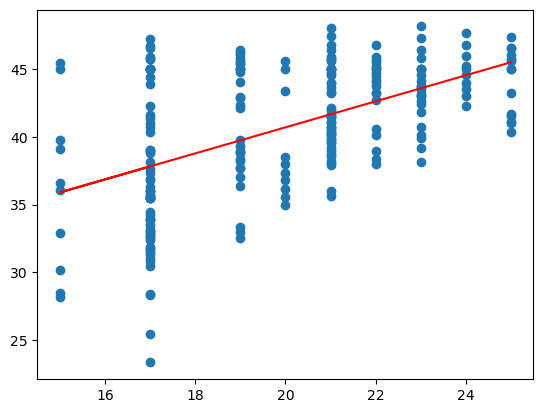

In [26]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

Correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(Correlation[0],2)}")

x_values = Capomulin_data_df["Weight (g)"]

y_values = Capomulin_data_df["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.show()
# plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")



#  = wdi_data.iloc[:,1]
# measles = wdi_data.iloc[:,12]
# correlation = st.pearsonr(income,measles)
# plt.scatter(income,measles)
# plt.xlabel('Income Per Capita')
# plt.ylabel('% Measles Immunization')
# print(f"The correlation between both factors is {round(correlation[0],2)}")
# plt.show()income


In [22]:
Capomulin_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0
